In [1]:
# Import essential libraries

import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
# Load flower Dataset

dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

228818944/228813984 [==============================] - 2s 0us/step


In [3]:
data_dir

'./datasets/flower_photos'

In [4]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [5]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/daisy/4837182901_69a6cc782b_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/3758221664_b19116d61f.jpg'),
 PosixPath('datasets/flower_photos/daisy/538920244_59899a78f8_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/3773181799_5def396456.jpg'),
 PosixPath('datasets/flower_photos/daisy/2612704455_efce1c2144_m.jpg')]

In [6]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [7]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/3475572132_01ae28e834_n.jpg'),
 PosixPath('datasets/flower_photos/roses/19566556880_476c66c5ee_n.jpg'),
 PosixPath('datasets/flower_photos/roses/8524505868_236f4c94b5.jpg'),
 PosixPath('datasets/flower_photos/roses/4881402397_1c664af2f7_n.jpg'),
 PosixPath('datasets/flower_photos/roses/6969041818_a505baa68e_m.jpg')]

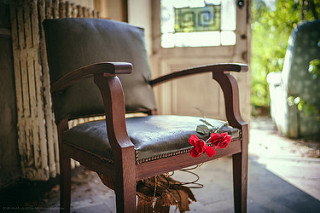

In [8]:
PIL.Image.open(str(roses[1]))

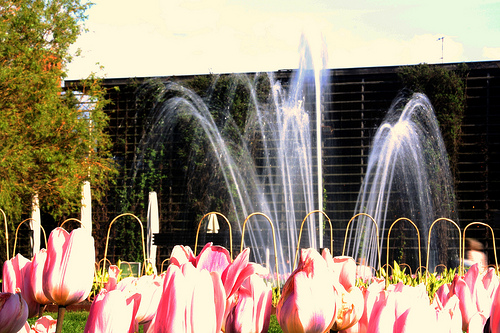

In [9]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [10]:
# Read flowers images from disk into numpy array using opencv

flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [11]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [12]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/3475572132_01ae28e834_n.jpg'),
 PosixPath('datasets/flower_photos/roses/19566556880_476c66c5ee_n.jpg'),
 PosixPath('datasets/flower_photos/roses/8524505868_236f4c94b5.jpg'),
 PosixPath('datasets/flower_photos/roses/4881402397_1c664af2f7_n.jpg'),
 PosixPath('datasets/flower_photos/roses/6969041818_a505baa68e_m.jpg')]

In [15]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/3475572132_01ae28e834_n.jpg'

In [16]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [17]:
img.shape

(240, 320, 3)

In [18]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [19]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [20]:
X = np.array(X)
y = np.array(y)

In [21]:
# Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [22]:
# Feature Scaling

X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [24]:
# Build convolutional neural network and training it

num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 [==============================] - 66s 763ms/step - loss: 1.5160 - accuracy: 0.3655
Epoch 2/30
86/86 [==============================] - 66s 763ms/step - loss: 0.9748 - accuracy: 0.6251
Epoch 3/30
86/86 [==============================] - 66s 762ms/step - loss: 0.7771 - accuracy: 0.7142
Epoch 4/30
86/86 [==============================] - 66s 762ms/step - loss: 0.5742 - accuracy: 0.7945
Epoch 5/30
86/86 [==============================] - 66s 762ms/step - loss: 0.4032 - accuracy: 0.8609
Epoch 6/30
86/86 [==============================] - 66s 767ms/step - loss: 0.2186 - accuracy: 0.9220
Epoch 7/30
86/86 [==============================] - 66s 767ms/step - loss: 0.1274 - accuracy: 0.9671
Epoch 8/30
86/86 [==============================] - 66s 766ms/step - loss: 0.0885 - accuracy: 0.9790
Epoch 9/30
86/86 [==============================] - 66s 769ms/step - loss: 0.0581 - accuracy: 0.9871
Epoch 10/30
86/86 [==============================] - 66s 770ms/step - loss: 0.0481 - accura

In [25]:
# Test accuracy

model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 7s 226ms/step - loss: 3.3065 - accuracy: 0.6275


[3.3064537048339844, 0.6274510025978088]

Here we see that while train accuracy is very high (99%), the test accuracy is significantly low (66.99%) indicating overfitting. Let's make some predictions before we use data augmentation to address overfitting

In [26]:
predictions = model.predict(X_test_scaled)
predictions

array([[ -1.0116745 ,  53.46103   ,   1.4258147 , -25.459763  ,
        -32.602013  ],
       [  2.0210133 ,  19.004057  ,   6.241725  ,  -9.160976  ,
        -21.04498   ],
       [  2.8550084 ,  -2.3250768 ,   7.382924  , -16.164413  ,
         -4.600899  ],
       ...,
       [ -3.110694  , -11.410402  ,  -0.7023726 ,   3.964592  ,
          2.499769  ],
       [ -7.1419945 ,  19.111603  ,   4.3257556 ,  -0.30296016,
         -2.7836134 ],
       [-11.6125145 ,  -7.006833  ,   7.9869804 ,  12.77091   ,
         -7.2465925 ]], dtype=float32)

In [27]:
score = tf.nn.softmax(predictions[0])

In [28]:
np.argmax(score)

1

In [29]:
y_test[0]

1


Improve Test Accuracy Using Data Augmentation

In [32]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal"),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

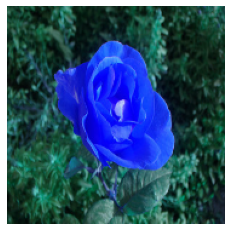

In [34]:
# Original image

plt.axis('off')
plt.imshow(X[0])

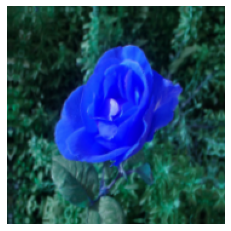

In [35]:
# Newly generated training sample using data augmentation

plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [36]:
# Train the model using data augmentation and a drop out layer

num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 [==============================] - 79s 903ms/step - loss: 1.4822 - accuracy: 0.3417
Epoch 2/30
86/86 [==============================] - 78s 905ms/step - loss: 1.0880 - accuracy: 0.5606
Epoch 3/30
86/86 [==============================] - 78s 905ms/step - loss: 0.9632 - accuracy: 0.6212
Epoch 4/30
86/86 [==============================] - 77s 901ms/step - loss: 0.8317 - accuracy: 0.6883
Epoch 5/30
86/86 [==============================] - 78s 902ms/step - loss: 0.8002 - accuracy: 0.6959
Epoch 6/30
86/86 [==============================] - 78s 901ms/step - loss: 0.7677 - accuracy: 0.7049
Epoch 7/30
86/86 [==============================] - 77s 900ms/step - loss: 0.7321 - accuracy: 0.7285
Epoch 8/30
86/86 [==============================] - 77s 899ms/step - loss: 0.7471 - accuracy: 0.7147
Epoch 9/30
86/86 [==============================] - 77s 896ms/step - loss: 0.6759 - accuracy: 0.7413
Epoch 10/30
86/86 [==============================] - 77s 893ms/step - loss: 0.6135 - accura

In [37]:
# Accuracy of Test Dataset

model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 7s 224ms/step - loss: 0.9767 - accuracy: 0.7026


[0.9766560196876526, 0.7026143670082092]

You can see that by using data augmentation and drop out layer the accuracy of test set predictions is increased to 70.26%